In [6]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
# import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T1_simple_model import *
from scipy import stats 

In [8]:
# Ik haal een bepaalde meting op en plot het gelijk
# df = get_df(stof=STOF_KOPERCHLORIDE_A,
#        verhouding="1_0",
#        T=T1,
#        delay=500,
#        signal_index=SI_SIGNAL)

# df.plot()

# Onderstaande code betreft het mengsel aceton en koperchloride in verhouding 1:1

De p waarde is 0.057928278.


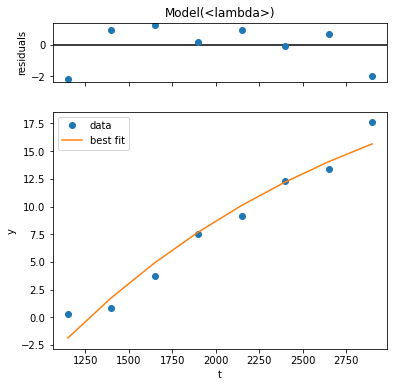

In [19]:
# Voor onze doelen is het super handig om alle dataframes
# van een bepaald reeks metingen op te halen.
# Ik plot hier steeds de data van de T1 meting van CuCl met verhouding 1:4
# Als de (delay, df) stuk in de for loop magisch lijkt omdat je er zelf niet op was gekomen.
# ik heb overal voorbeelden geplaatst bij de functies zelf!
# In visual studio code kun je dus hoveren met je muis over de functie get_df_of_all_delays en dan
# krijg je mijn voorbeelden te zien.
# In de notebook in je browser kun je gewoon naar de functie zelf gaan (ze staan allemaal in util/scopeutil.py)

Mz_lijst_koperchloride_aceton = []
delays = []

for (delay, df) in get_df_of_all_delays(
        stof=STOF_KOPERCHLORIDE_ACETOON,
        verhouding="1_1",
        T=T1,
        signal_index=SI_SIGNAL):

    mz = My_for_T1_df(df)
    # we willen de absolute waarde van alles
    # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
    if mz < 0:
        mz = mz * -1
    
    Mz_lijst_koperchloride_aceton.append(mz)
    delays.append(delay)

M0 = Mz_lijst_koperchloride_aceton[0]

# eerste drie elementen weghalen omdat die niet goed in ons onderzoek passen
Mz_koperchloride_aceton_final = []
delay_final = []
for x in range (0,11):
    # Bij de eerste 3 elementen hebben we zo dicht gemeten op pi dat het geen aangroei tijd had
    # De meetpunten in dat gebied zijn weggehaald
    if x >= 3:
        delay_final.append(delays[x])
        Mz_koperchloride_aceton_final.append(Mz_lijst_koperchloride_aceton[x])

fit_T1 = model_T1.fit(Mz_koperchloride_aceton_final, t=delay_final, M0=M0, T1=1000)
fit_T1.plot()

pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree) 
print(f"De p waarde is {pvalue:.9f}.")

fit_T1

# Nu gaan we over op koperchloride

## Koperchloride A, verhouding 1:0

[16.9000010125, 17.6000003875, 17.733333591666668, 17.9333333875, 20.900000965833332, 18.1999998, 22.933333555, 18.56666685, 17.433333870833334]
[400, 450, 500, 550, 600, 650, 700, 750, 800]
De p waarde is 0.000394964.


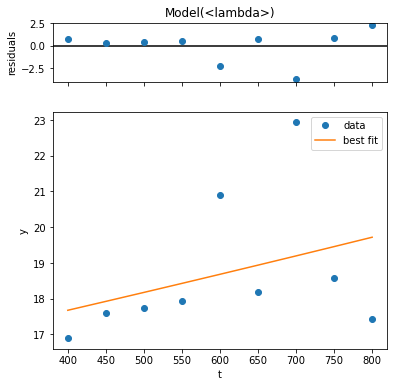

In [36]:
Mz_lijst_koperchloride_A = []
delays_A = []

for (delay, df) in get_df_of_all_delays(
        stof=STOF_KOPERCHLORIDE_A,
        verhouding="1_0",
        T=T1,
        signal_index=SI_SIGNAL):

    mz_A = My_for_T1_df(df)
    # we willen de absolute waarde van alles
    # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
    if mz < 0:
        mz = mz * -1
    
    Mz_lijst_koperchloride_A.append(mz_A)
    delays_A.append(delay)

print(Mz_lijst_koperchloride_A)
print(delays_A)

M0 = Mz_lijst_koperchloride_A[0]


fit_T1 = model_T1.fit(Mz_lijst_koperchloride_A, t=delays_A, M0=M0, T1=1000) #weights=np.array([1 for _ in range(9)]))
fit_T1.plot()
fit_T1

pvalue = 1 - stats.chi2.cdf(fit_T1.chisqr, fit_T1.nfree) 
print(f"De p waarde is {pvalue:.9f}.")

## Door naar koperchloride B, verhouding 1:0